<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/HW02/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 12-23-2022

### Ex02 - Q4

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import math
from scipy.stats import norm

In [1]:
LSAT = [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
GPA  = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96]

<Figure size 720x396 with 0 Axes>

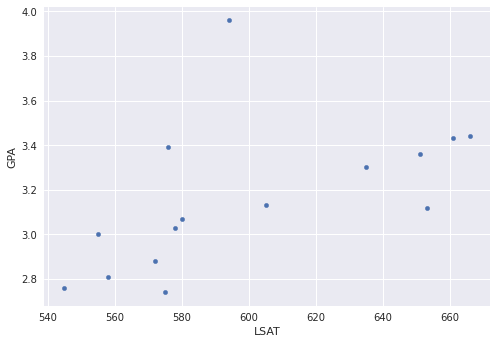

In [4]:
df = pd.DataFrame({'LSAT': LSAT, 'GPA': GPA})
with plt.style.context('seaborn'):
  plt.figure(figsize=(10, 5.5))
  df.plot.scatter(x='LSAT', y='GPA')

# a.

In [5]:
def corr(X, Y):
    mu_x = X.mean()
    mu_y = Y.mean()
    return sum((X - mu_x) * (Y - mu_y)) / math.sqrt(sum((X - mu_x)**2) * sum((Y - mu_y)**2))

In [6]:
X = df['LSAT'].to_numpy()
Y = df['GPA'].to_numpy()
theta_hat = corr(X, Y)
print('Estimated correlation coefficient: %.4f' % corr(X, Y))

Estimated correlation coefficient: 0.5459


## b.

In [9]:
nx = len(X)
ny = len(Y)

B = 1000000
t_boot = np.empty(B)
for i in tqdm(range(B)):
    xx = np.random.choice(X, nx, replace=True)
    yy = np.random.choice(Y, ny, replace=True)
    t_boot[i] = corr(xx, yy)
    
se = t_boot.std()
print('Estimated SE of correlation coefficient: %.4f' % se)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Estimated SE of correlation coefficient: 0.2671



## c.

In [13]:
z = norm.ppf(.975)

normal_conf = (theta_hat - z * se, theta_hat + z * se)
percentile_conf = (np.quantile(t_boot, .025), np.quantile(t_boot, .975))
pivotal_conf = (2*theta_hat - np.quantile(t_boot, 0.975), 2*theta_hat - np.quantile(t_boot, .025))

print('  |_ Normal:     95%% confidence interval is (%.3f, %.3f)' % normal_conf)
print('  |_ Percentile: 95%% confidence interval is (%.3f, %.3f)' % percentile_conf)
print('  |_ Pivotal:    95%% confidence interval is (%.3f, %.3f)' % pivotal_conf)

  |_ Normal:     95% confidence interval is (0.022, 1.069)
  |_ Percentile: 95% confidence interval is (-0.501, 0.524)
  |_ Pivotal:    95% confidence interval is (0.568, 1.593)


Finito